In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from scipy.io import loadmat
import numpy as np
import neurospyke as ns
from scipy.signal import convolve, resample
from scipy.signal.windows import gaussian
from scipy.ndimage import gaussian_filter1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
preprocessed_data = loadmat('./temp/preprocessed_data.mat')
spike_train = preprocessed_data['spike_train'][0][:]
stimulus_idxs = preprocessed_data['stimulus_idxs'][0][:]

In [10]:
sampling_frequency = 25000
sampling_time = 1 / sampling_frequency

resampling_frequency = 1000
resampling_time = 1 / resampling_frequency

frequency_ratio = sampling_frequency / resampling_frequency

bin_duration = 0.05
bin_samples = int(bin_duration * sampling_frequency)

n_bins = int(np.floor(np.size(spike_train, axis=0) / bin_samples))

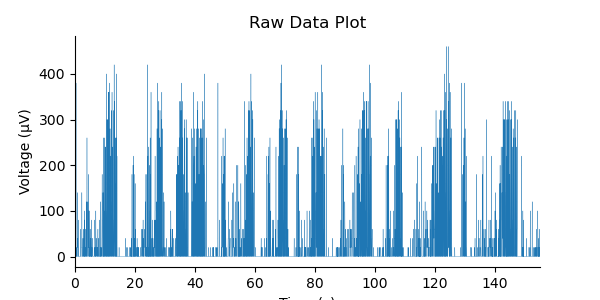

In [11]:
IFR = np.zeros(np.shape(spike_train))

for bin_idx in range(n_bins):
    bin_range = np.arange(bin_idx * bin_samples, bin_idx * bin_samples + bin_samples)
    bin = spike_train[bin_range]
    bin_spike_count = np.sum(bin)
    IFR[bin_range] = bin_spike_count / bin_duration


ns.visualization.plot_raw_data(IFR, sampling_time=sampling_time)

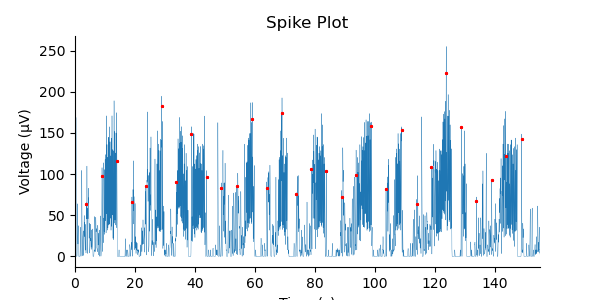

In [25]:
# filter = gaussian(3 * bin_samples, 0.95 * bin_samples)
# ns.visualization.plot_raw_data(filter)
# filtered_IFR = convolve(IFR, filter)
# ns.visualization.plot_raw_data(filtered_IFR, sampling_time=sampling_time)

filtered_IFR = gaussian_filter1d(IFR, 0.95 * bin_samples)
# ns.visualization.plot_raw_data(filtered_IFR, sampling_time=sampling_time)

resampled_IFR = resample(filtered_IFR, int(np.floor(np.size(spike_train, axis=0) / frequency_ratio)))
resampled_stimulus_idxs = np.round(stimulus_idxs / frequency_ratio).astype(np.int_)
ns.visualization.plot_spikes(resampled_IFR, resampled_stimulus_idxs, sampling_time=resampling_time)

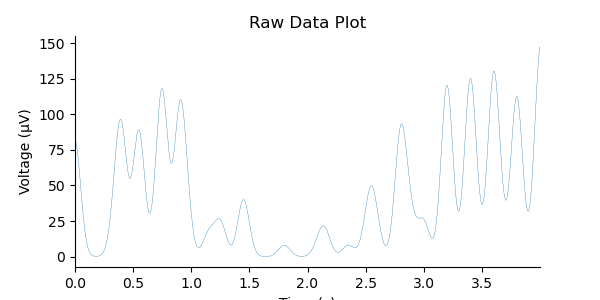

In [36]:
trial_duration = 4
trial_samples = trial_duration * resampling_frequency
trials = np.ndarray([np.size(resampled_stimulus_idxs), trial_samples])

for idx in range(np.size(resampled_stimulus_idxs)):
    stimulus_idx = resampled_stimulus_idxs[idx]
    trial_range = stimulus_idx + np.arange(0, trial_samples)
    trials[idx] = resampled_IFR[trial_range]

ns.visualization.plot_raw_data(trials[20], sampling_time=resampling_time)